# Yolo

In [1]:
!pip install ultralytics

In [2]:
from ultralytics import YOLO
 
# Load the model.
model = YOLO('yolov8n-cls.pt')

100%|█████████████████████████████████████████████████████████████████████████████| 5.31M/5.31M [00:01<00:00, 3.52MB/s]


In [8]:
# Training.
results = model.train(
   data='C:/new_project/dataset',
   imgsz=128,
   epochs=5,
   batch=8,
   name='yolov8n_cls_5e', 
   task='classify'
)

New https://pypi.org/project/ultralytics/8.3.99 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.98  Python-3.11.6 torch-2.5.1+cpu CPU (AMD Ryzen 3 3200U with Radeon Vega Mobile Gfx)
engine\trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=C:/new_project/dataset, epochs=5, time=None, patience=100, batch=8, imgsz=128, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8n_cls_5e6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=N

train: Scanning C:\new_project\dataset\train... 9579 images, 0 corrupt: 100%|██████████| 9579/9579 [00:03<00:00, 2448.8


train: New cache created: C:\new_project\dataset\train.cache


val: Scanning C:\new_project\dataset\val... 2300 images, 0 corrupt: 100%|██████████| 2300/2300 [00:01<00:00, 1579.55it/


val: New cache created: C:\new_project\dataset\val.cache
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
Image sizes 128 train, 128 val
Using 0 dataloader workers
Logging results to runs\classify\yolov8n_cls_5e6
Starting training for 5 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 144/144 [00:18<00:00,  7.92it/s]

                   all      0.735          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 144/144 [00:22<00:00,  6.32it/s]

                   all      0.763          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 144/144 [00:17<00:00,  8.01it/s]

                   all      0.791          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 144/144 [00:20<00:00,  7.05it/s]

                   all      0.797          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 144/144 [00:19<00:00,  7.29it/s]

                   all      0.787          1



5 epochs completed in 0.389 hours.
Optimizer stripped from runs\classify\yolov8n_cls_5e6\weights\last.pt, 3.0MB
Optimizer stripped from runs\classify\yolov8n_cls_5e6\weights\best.pt, 3.0MB

Validating runs\classify\yolov8n_cls_5e6\weights\best.pt...
Ultralytics 8.3.98  Python-3.11.6 torch-2.5.1+cpu CPU (AMD Ryzen 3 3200U with Radeon Vega Mobile Gfx)
YOLOv8n-cls summary (fused): 30 layers, 1,437,442 parameters, 0 gradients, 3.3 GFLOPs
train: C:\new_project\dataset\train... found 9579 images in 2 classes  
val: C:\new_project\dataset\val... found 2300 images in 2 classes  
test: C:\new_project\dataset\test... found 2000 images in 2 classes  


               classes   top1_acc   top5_acc: 100%|██████████| 144/144 [00:21<00:00,  6.61it/s]


                   all      0.799          1
Speed: 0.0ms preprocess, 6.2ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs\classify\yolov8n_cls_5e6


## Monitoring the results

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Downloading data from logs
import os

# Проверь, где находится последняя директория с результатами
base_dir = "C:/new_project/runs/classify"
last_run = sorted(os.listdir(base_dir))[-1]  # Берем последнюю папку
log_path = os.path.join(base_dir, last_run, "results.csv")

df = pd.read_csv(log_path)

# Check which columns are in the dataframe
print(df.columns)

Index(['epoch', 'time', 'train/loss', 'metrics/accuracy_top1',
       'metrics/accuracy_top5', 'val/loss', 'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')


In [7]:
%matplotlib inline

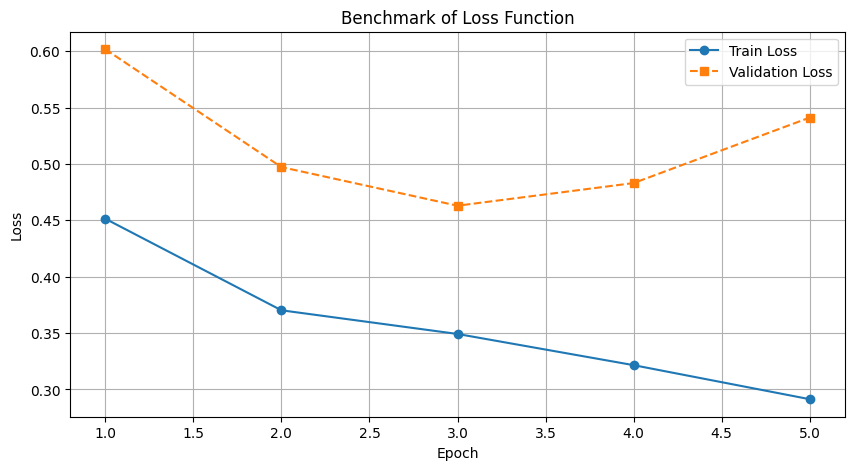

In [8]:
# Plotting the loss function (Loss)
plt.figure(figsize=(10, 5))
plt.plot(df["epoch"], df["train/loss"], label="Train Loss", marker="o")
plt.plot(df["epoch"], df["val/loss"], label="Validation Loss", linestyle="dashed", marker="s")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Benchmark of Loss Function")
plt.legend()
plt.grid()
plt.show()

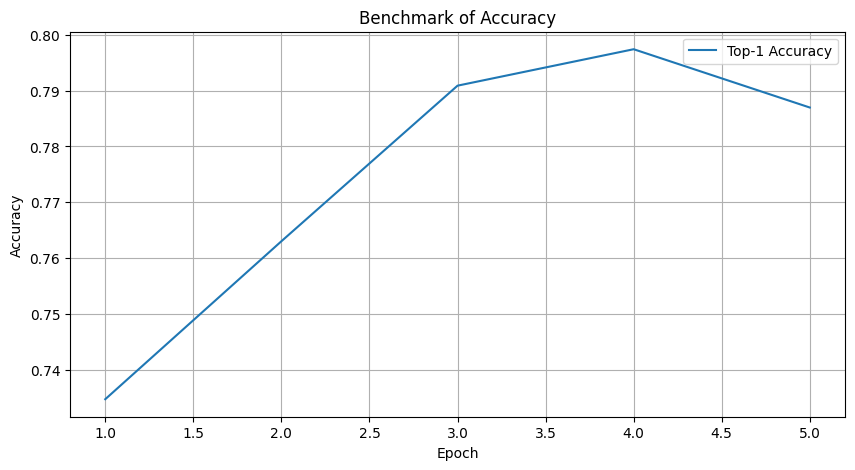

In [9]:
# Plotting the Accuracy
plt.figure(figsize=(10, 5))
plt.plot(df["epoch"], df["metrics/accuracy_top1"], label="Top-1 Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Benchmark of Accuracy")
plt.legend()
plt.grid()
plt.show()

In [12]:
import torch
import os
from glob import glob
from ultralytics import YOLO

# Loading model
model_path = os.path.join(base_dir, last_run, "weights/best.pt")
model = YOLO(model_path)

# Test data path - root folder containing 'Benign' and 'Malignant'
test_data_path = "C:/new_project/dataset/test"  # Folder containing 'Benign' and 'Malignant'

# Collecting image paths from 'Benign' and 'Malignant' directories
image_files = glob(os.path.join(test_data_path, 'Benign', '*.jpg')) + glob(os.path.join(test_data_path, 'Benign', '*.png'))
image_files += glob(os.path.join(test_data_path, 'Malignant', '*.jpg')) + glob(os.path.join(test_data_path, 'Malignant', '*.png'))


# Making predictions
results = model.predict(image_files, save=False)  # save=False to avoid saving images

# Create lists to store true and predicted labels
true_labels = []
predicted_labels = []

# Processing the results
for result in results:
    # Extract true label based on the folder name
    true_label = 0 if "Benign" in result.path else 1  # Checking if the image is in the "Benign" or "Malignant" folder
    
    # Extract the probabilities using 'data' from the 'Probs' object
    probs = result.probs.data  # Get the probabilities tensor
    
    # Compare the probabilities and assign the predicted label
    malign_prob = probs[0].item()  # Probability for 'Malignant'
    benign_prob = probs[1].item()  # Probability for 'Benign'
    
    # Determine predicted label based on higher probability
    predicted_label = 0 if malign_prob > benign_prob else 1  # 0 for 'Malignant', 1 for 'Benign'

    # Append true and predicted labels to the lists
    true_labels.append(true_label)
    predicted_labels.append(predicted_label)

# Save predictions to a CSV file
pred_df = pd.DataFrame({"true_labels": true_labels, "predicted_labels": predicted_labels})
pred_df.to_csv("C:/new_project/runs/classify/predictions.csv", index=False)

print("The predictions.csv file is saved!")



WARNING  inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

0: 128x128 Benign 0.87, Malignant 0.13, 5.1ms
1: 128x128 Benign 0.98, Malignant 0.02, 5.1ms
2: 128x128 Benign 0.93, Malignant 0.07, 5.1ms
3: 128x128 Malignant 0.75, Benign 0.25, 5.1ms
4: 128x128 Benign 0.98, Malignant 0.02, 5.1ms
5: 128x128 Benign 1.00, Malignant 0.00, 5.1ms
6: 128x128 Benign 1.00, Malignant 0.00, 5.1ms
7: 128x128 Benign 0.95, Malignant 0.05, 5.1ms
8: 128x128 Benign 0.96, Malignant 0.04, 5.1ms
9: 128x128 Benign 0.70, Malignant 0.30, 5.1m

In [13]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Getting metrics for the latest epoch
last_epoch = df.iloc[-1]  # We take the last line

accuracy_top1 = last_epoch["metrics/accuracy_top1"]
accuracy_top5 = last_epoch["metrics/accuracy_top5"]

predictions_path = "C:/new_project/runs/classify/predictions.csv"
pred_df = pd.read_csv(predictions_path)

y_true = pred_df["true_labels"]
y_pred = pred_df["predicted_labels"]

# Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average="weighted")
recall = recall_score(y_true, y_pred, average="weighted")
f1 = f1_score(y_true, y_pred, average="weighted")

# Results
print(f"Top-1 Accuracy: {accuracy_top1:.4f}")
print(f"Top-5 Accuracy: {accuracy_top5:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Top-1 Accuracy: 0.7870
Top-5 Accuracy: 1.0000
Precision: 0.8924
Recall: 0.8900
F1-score: 0.8898


# Inference

In [14]:
def get_device():
  # get type of device
  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
  print(f"device: {device}")

  # count the number of available GPU
  num_gpus = torch.cuda.device_count()

  if num_gpus:
      print("num gpus: ", num_gpus)

      for i in range(num_gpus):
          gpu_name = torch.cuda.get_device_name(i)
          print(f"GPU {i}: {gpu_name}")
  else:
      print("no GPUs are founded")

  return device

In [15]:
device = get_device()

device: cpu
no GPUs are founded


In [16]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import os

# Define the transformation for images (resize, normalize, etc.)
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize images if needed
    transforms.ToTensor(),          # Convert images to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalization (example)
])

test_data_path = "C:/new_project/dataset/test"

# Load the dataset using ImageFolder
test_dataset = datasets.ImageFolder(root=test_data_path, transform=transform)

# Create the DataLoader for the test set
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)


In [17]:
def inference_yolo(model, data_loader, device, sample_pos):
    # Getting the first data packet from data_loader
    batch = next(iter(data_loader))
    
    # Extracting images and labels
    x_test, y_test = batch  # x_test are images, y_test are labels

    # Selecting an image and a label for a given position
    x_test_sample = x_test[sample_pos].unsqueeze(0).to(device)  # Add the dimension for the package and send it to the device
    y_test_sample = y_test[sample_pos].to(device)  # Getting the real label for this image
    
    with torch.no_grad():
        output = model(x_test_sample)  
    
    probs = output[0].probs.data  

    malign_prob = probs[0].item()  
    benign_prob = probs[1].item()  

    # Getting the label with the highest probability
    predicted_label = 0 if malign_prob > benign_prob else 1  # 0 for 'Malignant', 1 for 'Benign'

    return x_test_sample, y_test_sample, malign_prob, benign_prob, predicted_label

In [18]:
image, label, malign_prob, benign_prob, predicted_label = inference_yolo(model, test_loader, device, sample_pos=12)

print(f"True label: {label}")
print(f"Malignant probability: {malign_prob}")
print(f"Benign probability: {benign_prob}")
print(f"Predicted label: {predicted_label}")


WARNING  torch.Tensor inputs should be normalized 0.0-1.0 but max value is 1.2042982578277588. Dividing input by 255.
0: 128x128 Benign 0.83, Malignant 0.17, 218.4ms
Speed: 6.7ms preprocess, 218.4ms inference, 26.5ms postprocess per image at shape (1, 3, 128, 128)
True label: 0
Malignant probability: 0.8258543610572815
Benign probability: 0.17414569854736328
Predicted label: 0
